In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, fligner, ttest_ind

In [2]:
# Recursos:
# Comparación de media (t-test)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

# Comprobación de normalidad
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

# Comparación de homocedasticidad
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.fligner.html

# Comparaciones de distr no parametricos
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [3]:
df = pd.read_csv('train.csv')
# df2 = pd.read_csv('test.csv')
# df.append(df2, sort=False)

In [4]:
df2 = pd.read_csv('test.csv')
#df2['PassengerId']
#df2['Survived'].unique()

In [5]:
df3 = pd.read_csv('gender_submission.csv')
# print(df3.columns)
#df3.loc[:,['PassengerId', 'Survived']]

In [6]:
df2['Survived'] = df3['Survived']

In [7]:
df4 = df.append(df2, sort=False)

In [8]:
df4.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Test de normalidad

Para comprobar la normalidad de las variables numéricas Age y Fare aplicaremos el test Shapiro-Wilk. La hipótesis nula es que la variable sigue una distribución normal. El nivel de significancia será $\alpha = 0.05$, si el p-valor es inferior a este, rechazaremos la hipótesis nula.

In [9]:
# test Saphiro Wilk para comprobar la normalidad de Age
print("Nº de observaciones:",  len(df['Age'].dropna()))
shapiro(df['Age'].dropna())

Nº de observaciones: 714


(0.9814548492431641, 7.322165629375377e-08)

In [10]:
# test Saphiro Wilk para comprobar la normalidad de Fare
print("Nº de observaciones:",  len(df['Fare'].dropna()))
shapiro(df['Fare'].dropna())

Nº de observaciones: 891


(0.5218914747238159, 1.0789998175301091e-43)

Ninguna de las dos variables estudiadas sigue una distribución normal. Sin embargo, dado que tenemos un gran número de observaciones (N = (714, 891) > 20) podemos asumir el teorema central del límite. La distribución de la media de las variables estudidas, gracias a la gran cantidad de observaciones, seguirá una distribución normal con una media de población $\mu$ y una varianza $\frac{\sigma^2}{N}$.

#  Test de homocedasticidad

Para comprobar la homocedasticidad de las variables usaremos el test de Fligner-Killeen, dado que nuestros datos no siguen una distribución normal. La hipótesis nula asume igualdad de varianza.

In [11]:
sobrevive = df['Survived'] == 1
nop = df['Survived'] == 0

hombre = df['Sex'] == 'male'
mujer = df['Sex'] == 'female'

niño = df['Age'] <= 12
adolescente = (df['Age'] > 12) & (df['Age'] < 18)
adulto = df['Age'] >= 18

primera = df['Pclass'] == 1
segunda = df['Pclass'] == 2
tercera = df['Pclass'] == 3

In [12]:
edadvssupervivencia = [df.loc[sobrevive, 'Age'].dropna() , df.loc[nop, 'Age'].dropna()]
edadvsclase = [df.loc[primera, 'Age'].dropna() , df.loc[segunda, 'Age'].dropna(), df.loc[tercera, 'Age'].dropna()]

In [13]:
billetevssupervivencia = [df.loc[sobrevive, 'Fare'].dropna() , df.loc[nop, 'Fare'].dropna()]
billetevsclase = [df.loc[primera, 'Fare'].dropna() , df.loc[segunda, 'Fare'].dropna(), df.loc[tercera, 'Fare'].dropna()]

In [14]:
fligner(*edadvssupervivencia)

FlignerResult(statistic=1.0436060696132083, pvalue=0.3069842761053375)

In [15]:
fligner(*edadvsclase)

FlignerResult(statistic=11.317210079614878, pvalue=0.0034873782605697604)

In [16]:
fligner(*billetevssupervivencia)

FlignerResult(statistic=96.2527395111909, pvalue=1.0111515793725321e-22)

In [17]:
fligner(*billetevsclase)

FlignerResult(statistic=365.7983079876698, pvalue=3.697487170015036e-80)

Todos los casos tienen pvalues > 0.05 por lo que podemos asumir homocedasticidad para todos los casos.

# Análisis estadístico

##  Comparación de medias (t-test)

$H_0: \mu_1 = \mu_2 $

In [18]:
# Edad supervivientes vs no
ttest_ind(*edadvssupervivencia)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

In [19]:
# Edad 1era clase vs 2da clase
ttest_ind(edadvsclase[0], edadvsclase[1])

Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)

In [20]:
# Edad 2da clase vs 3ra clase
ttest_ind(edadvsclase[1], edadvsclase[2])

Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)

In [21]:
# Edad 1era clase vs 3ra clase
ttest_ind(edadvsclase[0], edadvsclase[2])

Ttest_indResult(statistic=10.849122601201033, pvalue=6.134470007830625e-25)

In [22]:
# Billete supervivientes vs no
ttest_ind(*billetevssupervivencia)

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

In [23]:
# Billete 1ra clase vs 2da clase
ttest_ind(billetevsclase[0], billetevsclase[1])

Ttest_indResult(statistic=10.851594207309702, pvalue=3.303644173119574e-24)

In [24]:
# Billete 2da clase vs 3ra clase
ttest_ind(billetevsclase[1], billetevsclase[2])

Ttest_indResult(statistic=6.600620525446866, pvalue=8.304239675888693e-11)

In [25]:
# Billete 1ra clase vs 3ra clase
ttest_ind(billetevsclase[0], billetevsclase[2])

Ttest_indResult(statistic=19.448650285047485, pvalue=8.908959353672071e-68)

##  Wilcox o Mann-Whitney

In [26]:
# revisar apuntes estadística avanzada ->¿test previo para decidir uno ub otro? ¿Eran datos apareados?

# Correlación

In [27]:
df[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


#  Camparación de más de dos grupos - ANOVA

In [28]:
# https://ariepratama.github.io/How-to-Use-1-Way-Anova-in-Python/
# https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [29]:
# df[['Survived', 'Pclass']] = df[['Survived', 'Pclass']].astype('category')

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Comapararemos si hay diferencia entre la edad media de los supervivientes frente a los no, según sexo, clase y ¿sexo y clase (anova multivariante)?

WIP: $H_0: \mu_1 = \mu_2 = \mu_3 $

In [31]:
mod = ols('Age ~ Survived', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Survived', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                sum_sq     df        F    PR(>F)
Survived   1393.393233    1.0  6.54674  0.010833
Residual  95989.816667  451.0      NaN       NaN

ANOVA table for Female
----------------------
                sum_sq     df         F    PR(>F)
Survived    697.854747    1.0  3.539346  0.061051
Residual  51067.165847  259.0       NaN       NaN


In [32]:
mod = ols('Age ~ Pclass', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Pclass', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                sum_sq     df          F        PR(>F)
Pclass    15021.920691    1.0  82.258137  3.696490e-18
Residual  82361.289209  451.0        NaN           NaN

ANOVA table for Female
----------------------
                sum_sq     df          F        PR(>F)
Pclass     7721.467809    1.0  45.406422  1.032916e-10
Residual  44043.552785  259.0        NaN           NaN


In [33]:
mod = ols('Age ~ Survived * Pclass', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Survived * Pclass', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                       sum_sq     df           F        PR(>F)
Survived          4378.990734    1.0   25.238846  7.324544e-07
Pclass           18007.518192    1.0  103.788523  4.565761e-22
Survived:Pclass     79.892484    1.0    0.460470  4.977540e-01
Residual         77902.405992  449.0         NaN           NaN

ANOVA table for Female
----------------------
                       sum_sq     df          F        PR(>F)
Survived           431.715468    1.0   2.552968  1.113160e-01
Pclass            7455.328530    1.0  44.087404  1.857238e-10
Survived:Pclass    152.271568    1.0   0.900464  3.435487e-01
Residual         43459.565749  257.0        NaN           NaN


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# for female
# compare the age between survived , using 95% confidence interval 
mc = MultiComparison(df.loc[mujer, 'Age'].array, df.loc[mujer, 'Survived'].astype(int).array)

In [35]:
# tukey_result = mc.tukeyhsd(alpha=0.05)

# print(tukey_result)
# print('Unique diet groups: {}'.format(mc.groupsunique))

# Regresión

In [36]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [37]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
# Crear variables binarias para las variables categóricas
categoricas = ['Pclass', 'Sex']
for var in categoricas:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df_aux = df.join(cat_list)
    df = df_aux

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [40]:
y = df.loc[df['Age'].notnull(), 'Survived']
X = df.loc[df['Age'].notnull(), ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.329     
Dependent Variable:     Survived            AIC:                 657.2831  
Date:                   2020-05-31 14:25    BIC:                 680.1375  
No. Observations:       714                 Log-Likelihood:      -323.64   
Df Model:               4                   LL-Null:             -482.26   
Df Residuals:           709                 LLR p-value:         2.0742e-67
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         6.0000                                             
---------------------------------------------------------------------------
            Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
Age        -0.037

Age tiene un Pvalor > a 0.05 por lo que no es una variable que influya en el resultado en comparación con el resto de categorias, la podemos sacar del modelo.

In [41]:
y = df.loc[:, 'Survived']
X = df.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 9
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.303     
Dependent Variable:     Survived           AIC:                834.8884  
Date:                   2020-05-31 14:25   BIC:                854.0577  
No. Observations:       891                Log-Likelihood:     -413.44   
Df Model:               3                  LL-Null:            -593.33   
Df Residuals:           887                LLR p-value:        1.1450e-77
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         9.0000                                           
-------------------------------------------------------------------------
            Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
Pclass_1    0.9392 3575910.8963  0.0000 

In [42]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Crear variables binarias para las variables categóricas de test
categoricas = ['Pclass', 'Sex']
for var in categoricas:
    cat_list = pd.get_dummies(df2[var], prefix=var)
    df_aux = df2.join(cat_list)
    df2 = df_aux

X_test = df2.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']]
y_test = df2['Survived']

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[266   0]
 [  0 152]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



# Visualización

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

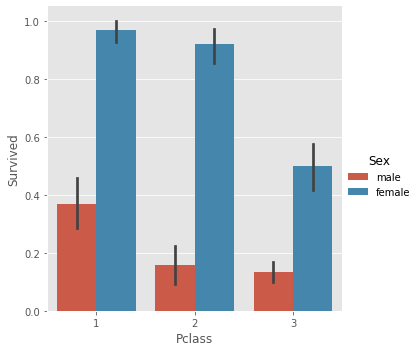

In [45]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df);

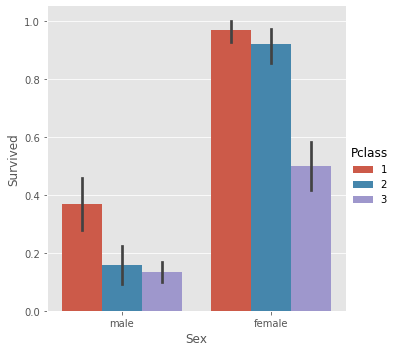

In [46]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

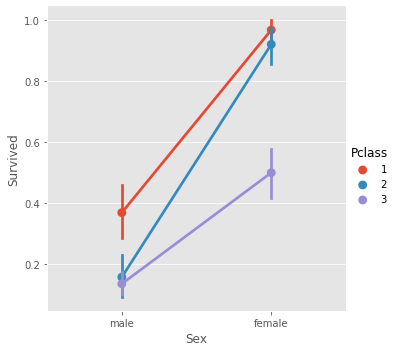

In [47]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=df);

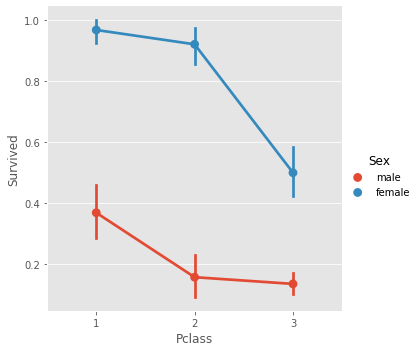

In [48]:
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            kind="point", data=df);

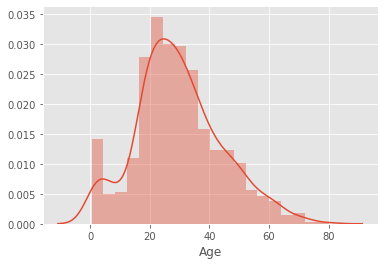

In [49]:
sns.distplot(df['Age'].dropna());

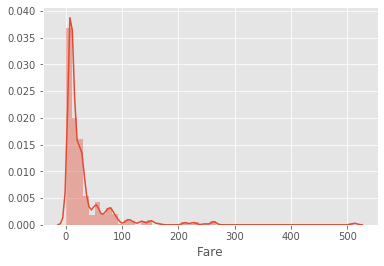

In [50]:
sns.distplot(df['Fare']);

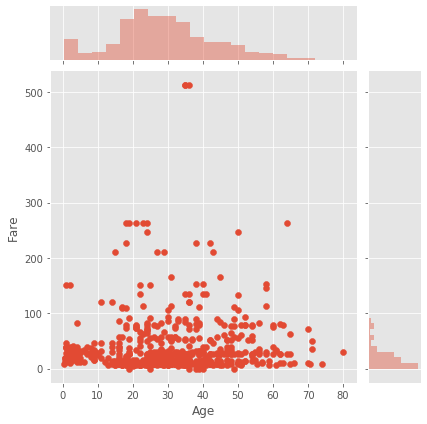

In [51]:
sns.jointplot(x="Age", y="Fare", data=df);

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


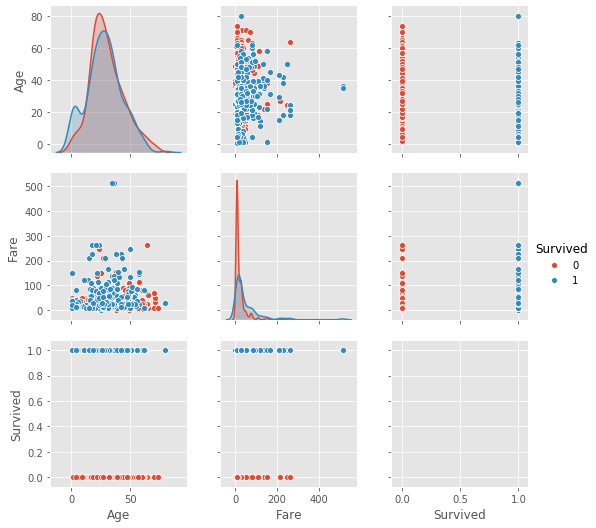

In [52]:
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue="Survived");

In [53]:
df['Age'].dropna().describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
714/10

71.4

In [55]:
df['Agecat'] = pd.cut(df['Age'].dropna(), 5)

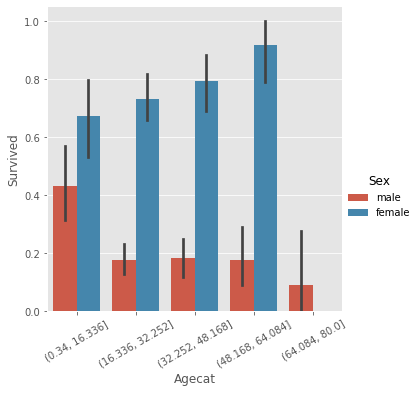

In [56]:
ax = sns.catplot(x="Agecat", y="Survived", hue="Sex", kind="bar", data=df)
ax.set_xticklabels(rotation=30);

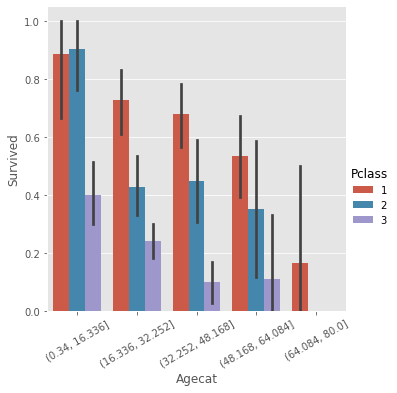

In [57]:
ax = sns.catplot(x="Agecat", y="Survived", hue="Pclass", kind="bar", data=df)
ax.set_xticklabels(rotation=30);